# Campo de Vientos

El campo Velocidad puede ser expresado como:

$\overrightarrow{V(x,y)}= u(x,y)\overrightarrow{i} +v(x,y)\overrightarrow{j}$

La ecuacion de líneas de corriente es:

$\displaystyle\ {{dy\over dx} = {v(x,y)\over u(x,y)}}$ 

en función de la vorticidad ${\zeta_o}$ , la divergencia ${\nabla_o}$ y los factores de deformación f1 y f2, es decir:

${u = \phi (\nabla_o,\zeta_o, f1, f2)}$

${v = \psi (\nabla_o,\zeta_o, f1, f2)}$

sería como sigue:

$\displaystyle\ { {u(x,y)= -\zeta_o  * y - \nabla_o * x + f1 * x -  f2 * y} }$
  
$\displaystyle\ { {v(x,y)= \zeta_o * x - \nabla_o * y - f1 * y - f2 * x} }$

reagrupando:

${\displaystyle\ { {u(x,y)= -(f2 + \zeta_o) * y  +  (f1 - \nabla_o) * x} } }$

${\displaystyle\ { { v(x,y)= -(f1 + \nabla_o)* y  -  (f2 - \zeta_o) * x} } }$
 
por tanto:

$\displaystyle\ {dy\over dx}  = \displaystyle\ {{-(f1 + \nabla_o)* y   -   ( f2 - \zeta_o) * x}\over{-(f2 + \zeta_o ) * y  +  (f1 - \nabla_o) * x}}$

o

$\displaystyle\ {dy\over dx}  = \displaystyle\ {{(\nabla_o + f1)* y   +   ( f2 - \zeta_o) * x}\over{(f2 + \zeta_o ) * y  +  (\nabla_o - f1) * x}}$


In [1]:
%matplotlib inline

In [2]:
#array
import numpy as np
#plot
import matplotlib.pyplot as plt
#3D
from mpl_toolkits.mplot3d.axes3d import Axes3D
#Color
from matplotlib import cm
#widgets
from ipywidgets import interact

In [3]:
def espiral (Vot=.7,Div=.5,f1=.2,f2=.1):
    
    # make data    
    
    #x = np.linspace(-5, 5, 11)
    #y = np.linspace(-5, 5, 11)
    #X, Y = np.meshgrid( x, y )
    
    Y, X= np.mgrid[-5:6,-5:6].astype('float64')
   
    u = -Vot*Y - Div*X + f1*X - f2*Y
    v = -Div*Y + Vot*X - f1*Y - f2*X
    
    #direcc=np.arctan(v/u)
        
    V = np.sqrt(u**2 + v**2)
    R = np.sqrt(X**2 + Y**2)

    # plot
    fig, ax = plt.subplots(1,4,figsize=(18,4))
    
    ax[0].quiver(X, Y, u, v, color="C0", angles='xy', scale_units='xy', scale=2, width=.005)
    ax[0].set_title("campo de direcciones")
    ax[1].streamplot(X, Y, u, v, cmap=cm.coolwarm)
    ax[1].set_title("lineas de corrientes")
    ax[2].contourf(X, Y, V, cmap=cm.coolwarm)
    ax[2].set_title("$ \overrightarrow{V(x,y)}= u(x,y)\overrightarrow{i} +v(x,y)\overrightarrow{j}$")
    ax[3].contourf(X, Y,  R, cmap=cm.coolwarm)
    ax[3].set_title("${R=\sqrt{(x^2+y^2)}}$")

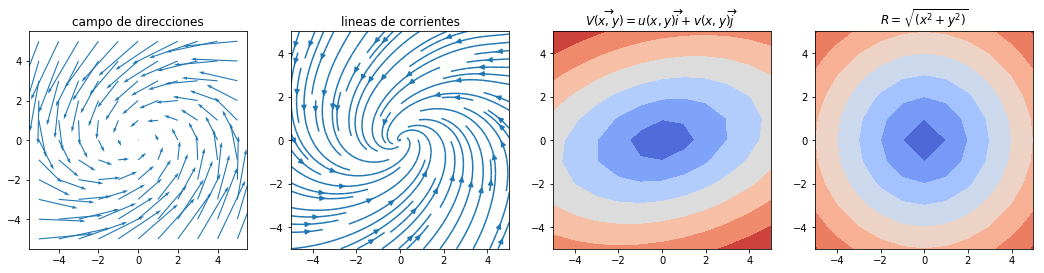

In [4]:
espiral()
#interact(espiral,Vot=(-1.0,1.0),Div=(-1.0,1.0),f1=(-1.0,1.0),f2=(-1.0,1.0))

# Podríamos hacer uso del campo de direcciones anterior y un campo de intensidad distinto, por ejemplo:

In [5]:
def f(x):
    return np.exp( - x ** 2  )

In [6]:
def Surf (fi=65, ci=25):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    
    X, Y = np.meshgrid(  x,  y )
        
    R = np.sqrt(X**2+Y**2)
    V = 120/(R**2 + 35)-f(R) 

    fig, ax=plt.subplots(figsize=(16,4))
    ax.set_title("${V = Vmax/((R)^2 + R_o)- {e^{-(R)^2}}}$", fontsize = 16)
    
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, V, cmap=cm.coolwarm)
    ax.view_init(fi, ci)  
    
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.contourf(X, Y, V, cmap=cm.coolwarm)
    ax.view_init(fi+10, ci+5)      
    
    #ax = fig.add_subplot(1, 3, 3)
    #ax.contourf(X, Y, V, cmap=cm.coolwarm)

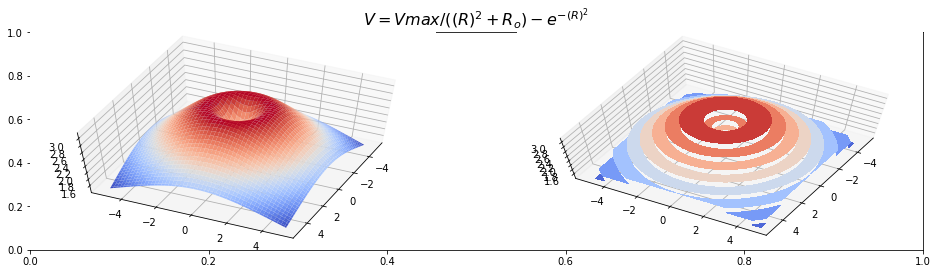

In [7]:
Surf(60,25)
#interact(Surf,fi = (0,85), ci = (0,85) )